#                FACE RECOGNITION


<div class="alert alert-block alert-info">
 Face recognition is the concept of recognizing the face through a computer machine. Computer Vision is the growing trend in the market. The intresting field of computer vision is made on the base of artifical intelligence to interpret the visuals around us. To interpret any visuals the computer machine is first trained by the dataset regarding the same image. Further , computer will analyse the image while testing and running the face recognisation model. It gives a confidence score , meaning how well has it interpretted your image.

The face recognition follows three basic steps:
 - Training
 - Testing 
 - Running
    
</div>


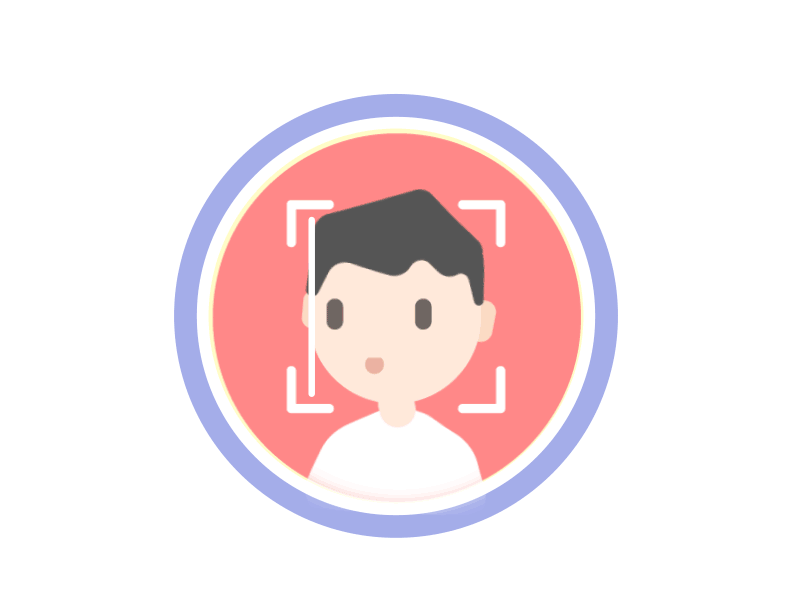

## <i> Creating Data For Training <i>

 <div class="alert alert-block alert-info">
 The following code creates data (images) by capturing around 100 photos using cv2 module . These photos are stored in the 
 directory. This directory act as the dataset for the model. You need to download the open-cv2 and the numpy library before 
 importing them in the following code.The following code crops the image and converts it into gray and stores in the 
 directory.
 
     As per the requirement we can create the number of dataset. Here we are collection two datasets and storing in two different folders, these folders must be pre-created by you. The images are automatically loaded into the folders.
     We have created two folder inside the one main folder <b>faces</b> i.e user1 and user2
   
 </div>
    
  
   

    




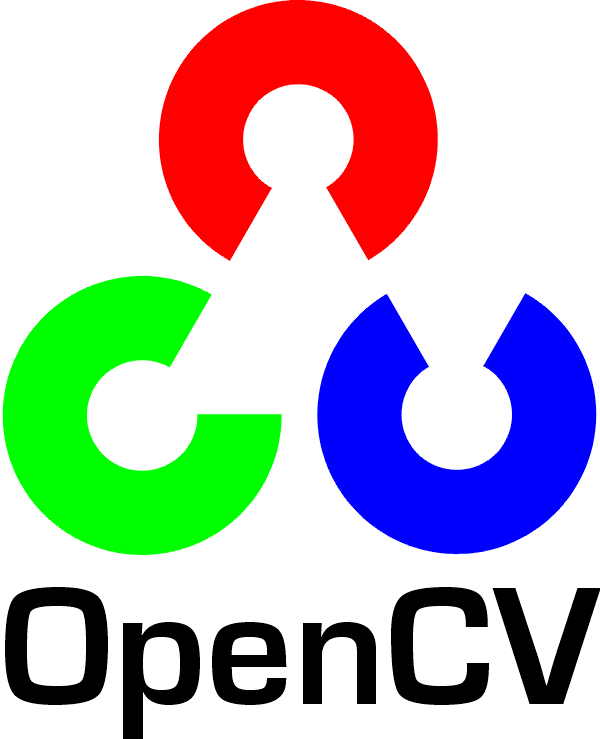

In [ ]:
/*************************************** COLLECTING DATA FOR USER1 *********************************************************/


import cv2
import numpy as np

cap = cv2.VideoCapture(0)
ret , photo = cap.read()

cv2.imwrite("pic1.jpg", photo)
# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = './faces/user1/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face Captured")
        pass

    if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

In [ ]:
/************************************************* COLLECTING DATA FOR USER2 **************************************************/

cap = cv2.VideoCapture(0)
ret , photo = cap.read()

cv2.imwrite("pic1.jpg", photo)
# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = './faces/user2/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face Captured")
        pass

    if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")




## Training the model

<div class="alert alert-block alert-info">
The next step is to train the model by the data collected in the above setup. The above data is stored in /file/user as images numbered as 1.jpg , 2.jpg and so on. Now we load the dataset and train the model . The model is trained so that  it predicts the output .
</div>

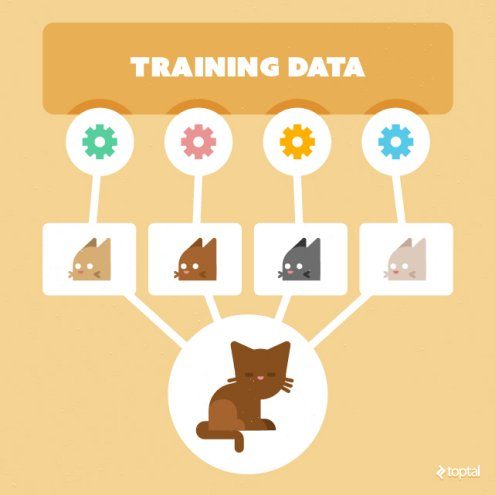

In [ ]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

# Get the training data we previously made
data_path = './faces/user1/'
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]

# Create arrays for training data and labels
Training_Data, Labels = [], []

# Open training images in our datapath
# Create a numpy array for training data
for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    Training_Data.append(np.asarray(images, dtype=np.uint8))
    Labels.append(i)

# Create a numpy array for both training data and labels
Labels = np.asarray(Labels, dtype=np.int32)

# Initialize facial recognizer
# model = cv2.face.createLBPHFaceRecognizer()
# NOTE: For OpenCV 3.0 use cv2.face.createLBPHFaceRecognizer()
# pip install opencv-contrib-python
# model = cv2.createLBPHFaceRecognizer()

user1_model  = cv2.face_LBPHFaceRecognizer.create()
# Let's train our model 
user1_model.train(np.asarray(Training_Data), np.asarray(Labels))
print("Model trained sucessefully")

## Running Facial recognition 
 
 
<div class="alert alert-block alert-info">
 After the model is trained. We run the facial recognisation model which when recognises your face sends the whatsapp text to the provided number , sends the email and even launches an instances over AWS Cloud.
</div>

<div class="alert alert-block alert-info">
    
We have used the Harcascade model for facial recognition. Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.OpenCV provides a training method (see Cascade Classifier Training) or pretrained models, that can be read using the cv::CascadeClassifier::load method. The pretrained models are located in the data folder in the OpenCV installation.
    

The following code is set to a count "c" which is incremented after every face detection and does the following things when the required confidence is made.
   
</div>
    

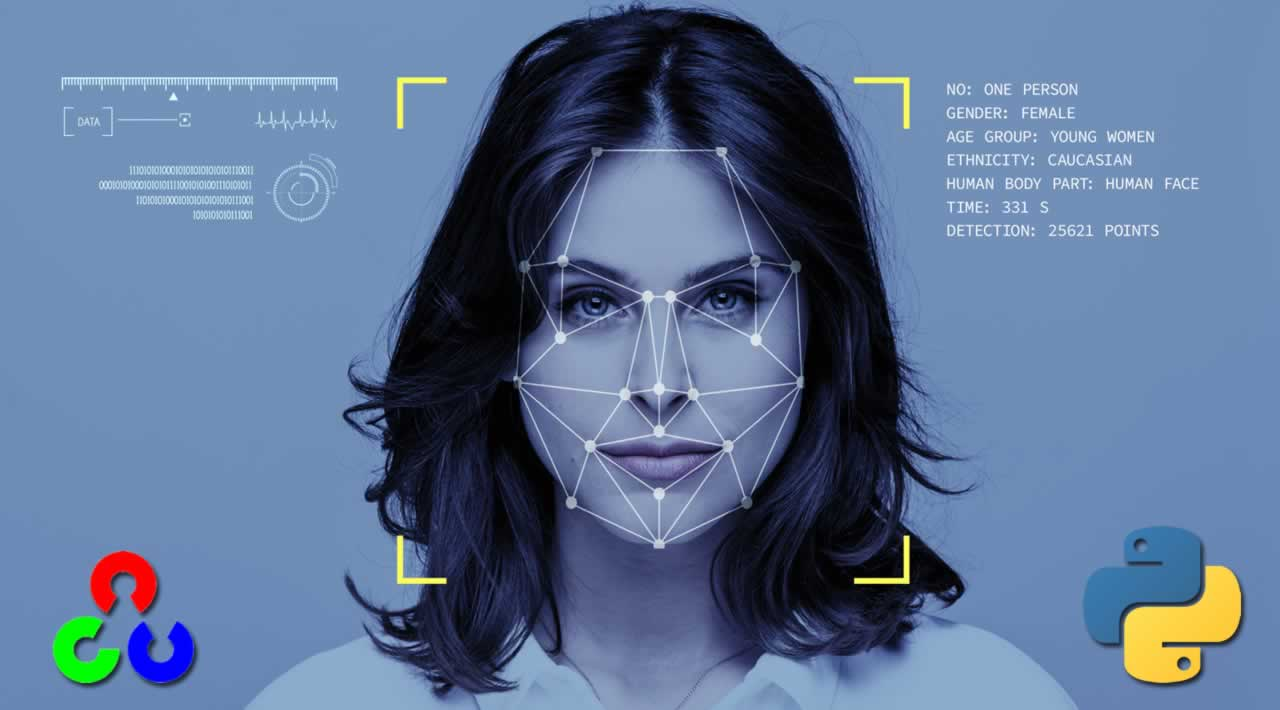

<div class="alert alert-block alert-warning">
<b>FOR USER1</b> 
 - Running the following code which when detects the user1 with a good confidence does the following mentioned actions.
</div>

In [ ]:
c = 0
while c<3:
    print(c)
    c+=1
    import cv2
    import numpy as np
    import os
    import time

    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    def face_detector(img, size=0.5):

        # Convert image to grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        if faces is ():
            return img, []


        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
            roi = img[y:y+h, x:x+w]
            roi = cv2.resize(roi, (200, 200))
        return img, roi


    # Open Webcam
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()

        image, face = face_detector(frame)

        try:
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

            # Pass face to prediction model
            # "results" comprises of a tuple containing the label and the confidence value
            results = user1_model.predict(face)
            # harry_model.predict(face)

            if results[1] < 500:
                confidence = int( 100 * (1 - (results[1])/400) )
                display_string = str(confidence) + '% Confident it is User'

            cv2.putText(image, display_string, (100, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (255,120,150), 2)

/******************************************************* SENDING MAIL ******************************************************/
            if confidence > 80:
                cv2.putText(image, "Hey Divya", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
                cv2.imshow('Face Recognition', image )
                if c==1:
                    import smtplib, ssl
                    import config
                    from email.mime.text import MIMEText
                    from email.mime.base import MIMEBase
                    from email.mime.multipart import MIMEMultipart
                    from email import encoders

                    #Sender, Reciever, Body of Email
                    sender = config.mail                      # Taking the values from config.py file
                    receivers = ['divyanshus10112k@gmail.com']
                    body_of_email = 'Hi.This is your face Divyanshu.'

                    #Creating the Message, Subject line, From and To
                    msg = MIMEMultipart()
                    msg['Subject'] = 'Face_detected'
                    msg['From'] = sender
                    msg['To'] = ','.join(receivers)

                    #Adds a csv file as an attachment to the email 
                    part = MIMEBase('application', 'octet-stream')
                    part.set_payload(open('pic1.jpg', 'rb').read())
                    encoders.encode_base64(part)
                    part.add_header('Content-Disposition', 'attachment; filename ="d.jpg"')
                    msg.attach(part)

                    #Connecting to Gmail SMTP Server
                    s = smtplib.SMTP_SSL(host = 'smtp.gmail.com', port = 465)
                    s.login(user = config.mail, password = config.password)
                    s.sendmail(sender, receivers, msg.as_string())
                    s.quit()
                    break
                
    /******************************** SENDING WHATSAPP MESSAGE ***************************************************************/            
                
                elif c==2:
                     from twilio.rest import Client #Create a twilio account and add the account id and token. 
                                                    # These credentials will allow python to access twilio API and send message.

                    account_sid = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX' 
                    auth_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX' 
                    client = Client(account_sid, auth_token) 

                    message = client.messages.create( 
                                  from_='whatsapp:+14155238886',  # This is the default twilio number which sends the message.
                                  body='HEY, I TEXTED YOU FROM THE PYTHON. ',      
                                  to='whatsapp:+91XXXXXXXXX'  # The number you wish to send the message to.
                                   ) 
                     print(" The job is done ")
                    break 
 
 /************************************************* RUNNING TERRAFORM CODE ***************************************************/
                elif c==3:
                    
                    os.system("terraform init")
                    os.system("terraform apply --auto-approve")
                         break


            else:

                cv2.putText(image, "I dont know, Who are you", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
                cv2.imshow('Face Recognition', image )

        except:
            cv2.putText(image, "No Face Found", (220, 120) , cv2.FONT_HERSHEY_COMPLEX, 1, (14, 67, 89), 2)
            cv2.putText(image, "looking for face", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (14, 67, 89), 2)
            cv2.imshow('Face Recognition', image )
            pass

        if cv2.waitKey(1) == 13 or (c == 3): #13 is the Enter Key
            break

    cap.release()
    cv2.destroyAllWindows()   
else:
    cap.release()
    cv2.destroyAllWindows()